In [1]:
import sklearn

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
df1 = pd.read_csv('delhi_traffic_features.csv')
df2 = pd.read_csv('delhi_traffic_target.csv')

In [37]:
df = pd.merge(df1, df2, how = 'left', on='Trip_ID')

In [39]:
df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0


In [41]:
df.isnull().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [43]:
df.isna().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
travel_time_minutes      0
dtype: int64

In [45]:
df.dtypes

Trip_ID                   object
start_area                object
end_area                  object
distance_km              float64
time_of_day               object
day_of_week               object
weather_condition         object
traffic_density_level     object
road_type                 object
average_speed_kmph       float64
travel_time_minutes      float64
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
 10  travel_time_minutes    4000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [49]:
df.describe()

,distance_km,average_speed_kmph,travel_time_minutes
count,4000.000000,4000.000000,4000.000000
mean,13.342965,28.085300,40.155925
std,6.367559,17.057224,31.883265
min,1.510000,4.800000,2.100000
25%,8.660000,14.500000,18.400000
50%,13.170000,24.200000,30.300000
75%,17.230000,38.200000,52.100000
max,33.010000,93.300000,283.600000


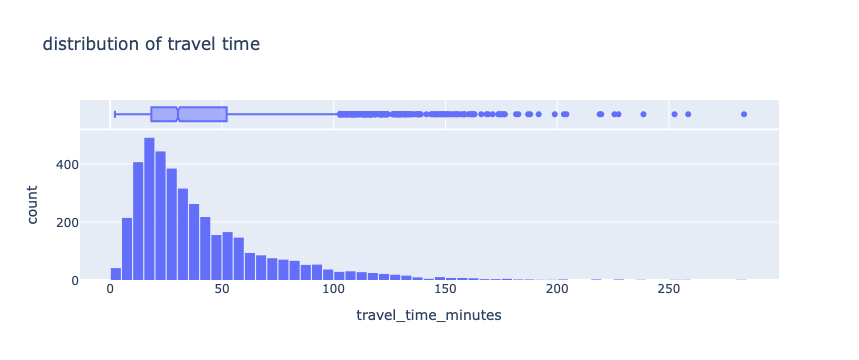

In [73]:
fig = px.histogram(df,
             x= 'travel_time_minutes',
             marginal= 'box',
             title='distribution of travel time')
fig.update_layout (bargap=0.1)

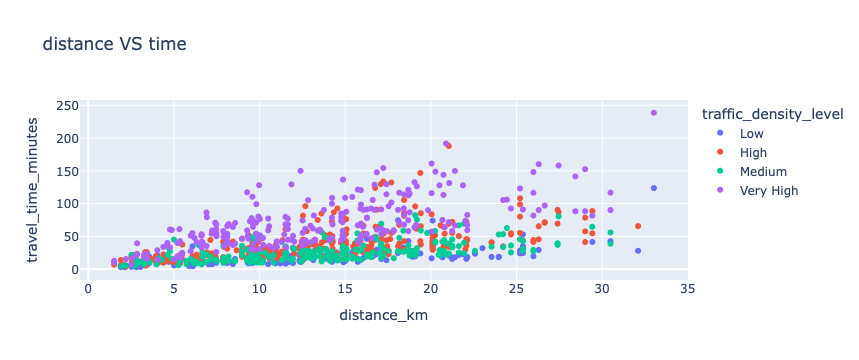

In [66]:
px.scatter(df.head(1000),
          x = 'distance_km',
          y = 'travel_time_minutes',
          color = 'traffic_density_level',
          title = 'distance VS time')

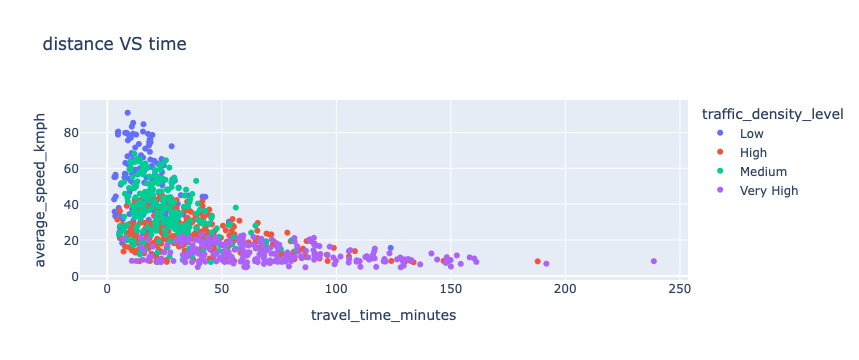

In [68]:
px.scatter(df.head(1000),
          x = 'travel_time_minutes',
          y = 'average_speed_kmph',
          color = 'traffic_density_level',
          title = 'distance VS time')

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [114]:
X = df[['start_area','end_area','distance_km','time_of_day','day_of_week','weather_condition','road_type','average_speed_kmph','travel_time_minutes']]
y= df['traffic_density_level']

In [128]:
num_cols = X.select_dtypes('float64').columns.to_list()
cat_cols = X.select_dtypes('object').columns.to_list()

In [130]:
preprocess = ColumnTransformer([
    ('num', Pipeline([
        'scale', StandardScaler()
    ]), num_cols),
    ('cat', Pipeline([
        'encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ]), cat_cols)
])